# Importing Libraries

In [1]:
# libraries for automating the data analysis process

import os 
from glob import glob

# libraries for data analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defining Folder Variables

In [2]:
# Set relative paths for different folders
MAIN_FOLDER = os.path.abspath(os.path.join(os.getcwd(), ".."))

CODE_FOLDER = os.path.join(MAIN_FOLDER, "Code")

PROFILE_FOLDER = os.path.join(CODE_FOLDER, "ProfileReports")

DATA_FOLDER = os.path.join(MAIN_FOLDER, "Data")

RAW_SHEETS_FOLDER = os.path.join(DATA_FOLDER, "Raw_Sheets")

CLEANED_SHEETS_FOLDER = os.path.join(DATA_FOLDER, "Cleaned_Sheets")


# Defining Sheet Variable

In [3]:
SAVE_TO_CSV = os.path.join(CLEANED_SHEETS_FOLDER, "cleaned_sheet.csv")

# Loading Data

In [4]:
final_df = pd.read_csv(SAVE_TO_CSV)
final_df.head(-10)

,OrderNumber,CUSTID,JOBTYPE,Department,FROMLOCSTR,TOLOCSTR,STARTTM,ENDTM,TripDuration,CTCOMPLETEDT,DriverId,PrimeMoverId,TrailerId,JOINED DATE,RESIGNED DATE,RACE,Team,Status,AGE_Years,Seniority
0,TL9008453,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-07 08:00:00,2021-01-07 08:30:00,0.5,2021-01-07,2,215,1538.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,16.0,53.58,13.72
1,TL9008453,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-07 10:30:00,2021-01-07 11:00:00,0.5,2021-01-07,2,215,972.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,16.0,53.58,13.72
2,TL9009105,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-27 08:00:00,2021-01-27 08:30:00,0.5,2021-01-27,2,215,972.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,6.0,53.58,13.72
3,TL9009105,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-27 10:30:00,2021-01-27 11:00:00,0.5,2021-01-27,2,215,1538.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,6.0,53.58,13.72
4,TL9008550,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-11 08:00:00,2021-01-11 08:30:00,0.5,2021-01-11,2,215,1538.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,13.0,53.58,13.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081769,XI7007593,00-RE114,IMPORT,XINHUA,31GUL CR,14 PENJ RD,2023-12-12 08:30:00,2023-12-12 09:30:00,1.0,2023-12-12,169,296,1771.0,2007-12-01,2023-12-31,CHINESE,Team 1,13.0,55.33,16.08
1081770,XI7007593,00-RE114,IMPORT,XINHUA,14 PENJ RD,EKY2,2023-12-12 09:30:00,2023-12-12 10:00:00,0.5,2023-12-12,169,296,1771.0,2007-12-01,2023-12-31,CHINESE,Team 1,13.0,55.33,16.08
1081771,XI7007610,00-RE114,IMPORT,XINHUA,PSA/PPT,PTC ISL (G),2023-12-12 09:00:00,2023-12-12 10:00:00,1.0,2023-12-12,379,338,1499.0,2014-11-01,2023-12-31,MALAY,Team 1,9.0,55.08,9.16
1081772,XI7007610,00-RE114,IMPORT,XINHUA,PTC ISL (G),CWT47JLNBUROH,2023-12-13 11:00:00,2023-12-13 12:00:00,1.0,2023-12-13,356,336,1934.0,2012-08-24,2023-12-31,MALAY,Team 1,8.0,37.42,11.35


# Exploratory Data Analysis (EDA)

## Delivery Route Analysis 

### Number of Unique 1-1 FROM and TO Location Combinations

In [5]:
unique_trip_count = final_df.groupby(['FROMLOCSTR', 'TOLOCSTR']).size().count()
print(unique_trip_count)

8023


### Number of Unique FROM Locations

In [6]:
final_df['FROMLOCSTR'].nunique()

487

### Number of Unique TO Locations

In [7]:
final_df['TOLOCSTR'].nunique()

497

# Anonymise Department Names

In [8]:
final_df_2['Department'].replace('CHIEN', 'Team A', inplace=True)
final_df_2['Department'].replace('XINHUA', 'Team B', inplace=True)
final_df_2['Department'].replace('MAIN', 'Team C', inplace=True)
final_df_2['Department'].replace('EXPRESS', 'Team D', inplace=True)

NameError: name 'final_df_2' is not defined

## Data Visualisation

### Boxplot of TripDuration

In [9]:
final_df_2 = final_df.drop(final_df[final_df['TripDuration'] > 500].index)

final_df_2

,OrderNumber,CUSTID,JOBTYPE,Department,FROMLOCSTR,TOLOCSTR,STARTTM,ENDTM,TripDuration,CTCOMPLETEDT,DriverId,PrimeMoverId,TrailerId,JOINED DATE,RESIGNED DATE,RACE,Team,Status,AGE_Years,Seniority
0,TL9008453,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-07 08:00:00,2021-01-07 08:30:00,0.500000,2021-01-07,2,215,1538.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,16.0,53.58,13.72
1,TL9008453,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-07 10:30:00,2021-01-07 11:00:00,0.500000,2021-01-07,2,215,972.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,16.0,53.58,13.72
2,TL9009105,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-27 08:00:00,2021-01-27 08:30:00,0.500000,2021-01-27,2,215,972.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,6.0,53.58,13.72
3,TL9009105,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-27 10:30:00,2021-01-27 11:00:00,0.500000,2021-01-27,2,215,1538.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,6.0,53.58,13.72
4,TL9008550,00-RE001,LOCAL,CHIEN,JI DRUM,1 SERAYA AVE,2021-01-11 08:00:00,2021-01-11 08:30:00,0.500000,2021-01-11,2,215,1538.0,2007-06-07,2021-02-23,CHINESE,CHIEN LI,13.0,53.58,13.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081779,TE8037442,00-RA186,EXPORT,MAIN,PTC48(G),42PANDAN1,2023-12-06 09:50:00,2023-12-06 10:00:00,0.166667,2023-12-06,220,222,1772.0,2008-03-17,2023-12-31,CHINESE,FCL,34.0,51.33,15.79
1081780,TL9050450,00-RA186,LOCAL,CHIEN,COGENT TANK 15,48DRUMMING,2023-12-04 10:30:00,2023-12-04 12:00:00,1.500000,2023-12-04,37,145,119.0,2004-06-25,2023-12-31,CHINESE,CHIEN LI,8.0,68.25,19.52
1081781,TL9050450,00-RA186,LOCAL,CHIEN,48DRUMMING,STOLT NEL,2023-12-06 05:39:00,2023-12-06 05:59:00,0.333333,2023-12-06,302,394,119.0,2008-08-22,2023-05-10,CHINESE,CHIEN LI,21.0,39.08,14.71
1081782,TE8037521,00-RA186,EXPORT,MAIN,42PANDAN1,PSA/PPT,2023-12-13 09:30:00,2023-12-13 10:30:00,1.000000,2023-12-13,110,424,1937.0,2000-11-20,2022-10-02,CHINESE,FCL,8.0,58.92,21.86


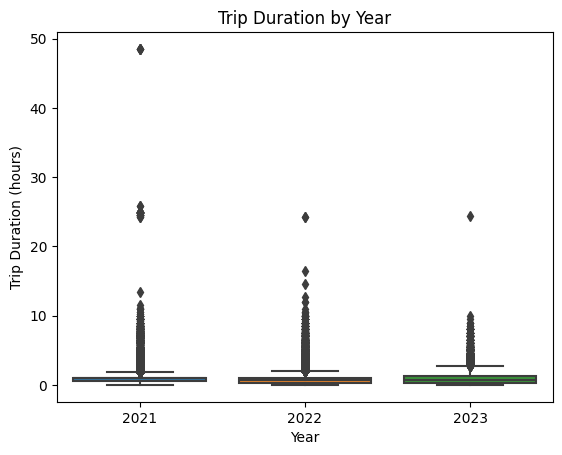

In [10]:
# extract year from date 

final_df_2['CTCOMPLETEDT'] = pd.to_datetime(final_df_2['CTCOMPLETEDT'])

final_df_2['Year'] = final_df_2['CTCOMPLETEDT'].dt.year
final_df_2['Month'] = final_df_2['CTCOMPLETEDT'].dt.month

# plot boxplots for each year

sns.boxplot(x='Year', y='TripDuration', data=final_df_2)

plt.title('Trip Duration by Year')
plt.xlabel('Year')
plt.ylabel('Trip Duration (hours)')
plt.show()

### Boxplot of Age

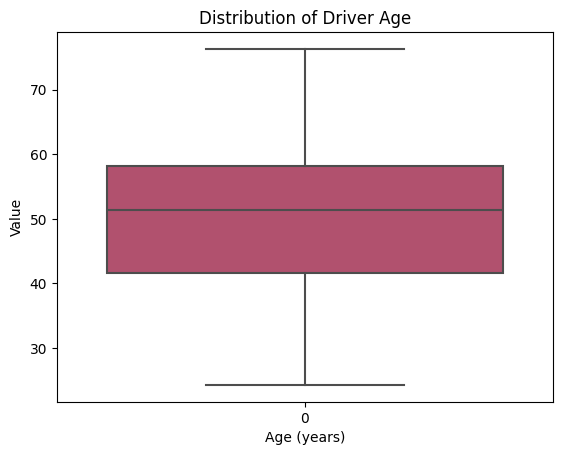

In [11]:
sns.boxplot(data=final_df['AGE_Years'], palette='flare')

plt.title('Distribution of Driver Age')
plt.xlabel('Age (years)')
plt.ylabel('Value')
plt.show()

### Boxplot of Status

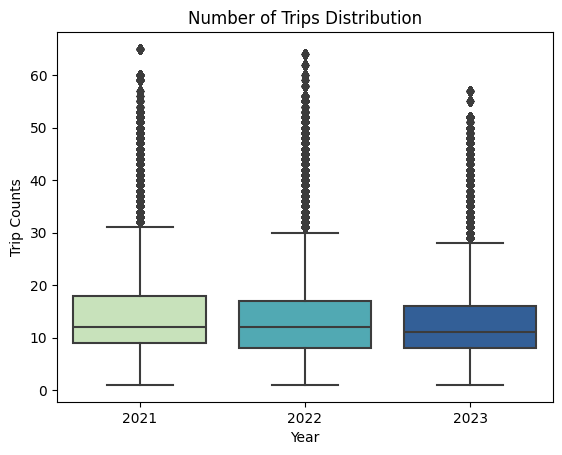

In [12]:
sns.boxplot(x='Year', y='Status', data=final_df_2, palette='YlGnBu')

plt.title('Number of Trips Distribution')
plt.xlabel('Year')
plt.ylabel('Trip Counts')
plt.show()

### Boxplot of Seniority

In [13]:
sns.boxplot(x='Year', y='Seniority', data=final_df, palette='flare')

plt.title('Seniority Distribution')
plt.xlabel('Seniority (years)')
plt.ylabel('Value')
plt.show()

ValueError: Could not interpret input 'Year'

### Count plot of JOBTYPE

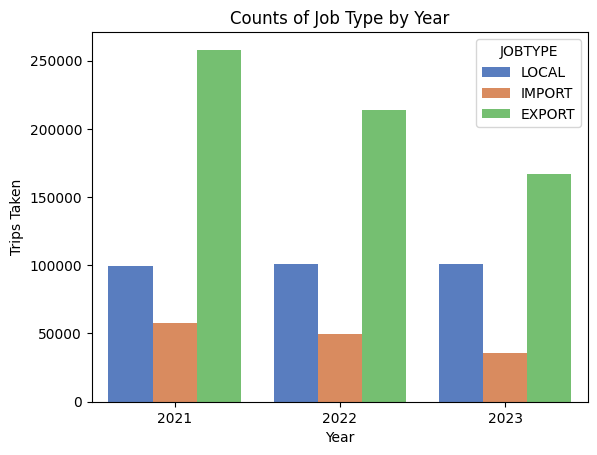

In [14]:
# to see year-on-year total number of trips taken by each job type

final_df['CTCOMPLETEDT'] = pd.to_datetime(final_df['CTCOMPLETEDT'])
final_df['Year'] = final_df['CTCOMPLETEDT'].dt.year

sns.countplot(data=final_df, x='Year', hue='JOBTYPE', palette='muted')

plt.title('Counts of Job Type by Year')
plt.xlabel('Year')
plt.ylabel('Trips Taken')
plt.legend(title='JOBTYPE')
plt.show()

### Countplot of Department

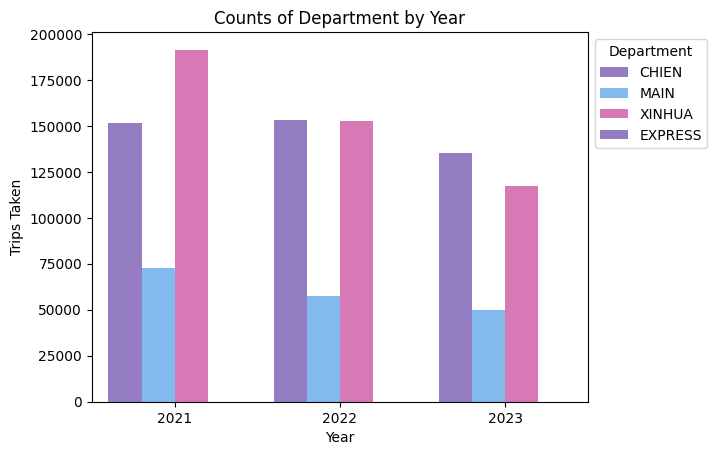

In [15]:
# to see year-on-year total number of trips taken by each department
final_df_2['CTCOMPLETEDT'] = pd.to_datetime(final_df_2['CTCOMPLETEDT'])

final_df_2['Year'] = final_df_2['CTCOMPLETEDT'].dt.year
final_df_2['Month'] = final_df_2['CTCOMPLETEDT'].dt.month

ax = sns.countplot(data=final_df_2, x='Year', hue='Department', palette=['#9071CE', '#70BBFF', '#E669B9'])

plt.title('Counts of Department by Year')
plt.xlabel('Year')
plt.ylabel('Trips Taken')
plt.legend(title='Department')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### Countplot of Race

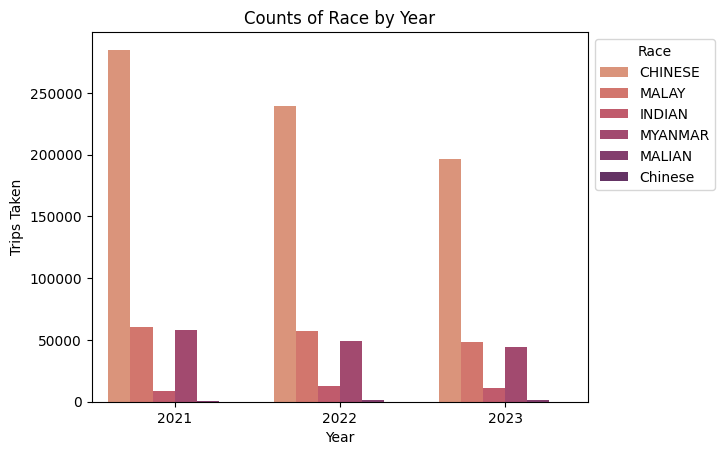

In [16]:
# to see year-on-year total number of trips taken by each Race

ax = sns.countplot(data=final_df, x='Year', hue='RACE', palette='flare')

plt.title('Counts of Race by Year')
plt.xlabel('Year')
plt.ylabel('Trips Taken')
plt.legend(title='Race')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

### Countplot of Team

C:\DBA_Test\Code\sutd_eda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\DBA_Test\Code\sutd_eda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


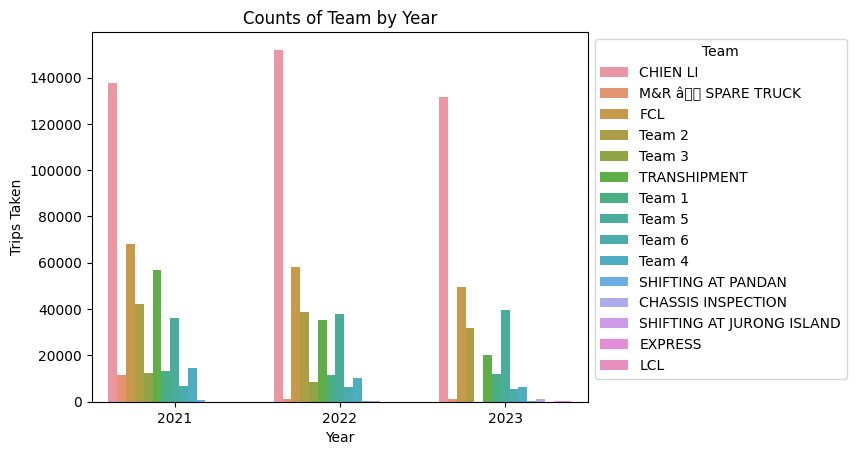

In [17]:
ax = sns.countplot(data=final_df, x='Year', hue='Team')

plt.title('Counts of Team by Year')
plt.xlabel('Year')
plt.ylabel('Trips Taken')
plt.legend(title='Team')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# Statistical Analysis

The detailed statistical summary of each variable can be found in the automated y-data profiling html file, and is placed in the Project Report for easier reference. 

Analysis of "Status" values is in time_series notebook.